In [51]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error

In [52]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [53]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [54]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

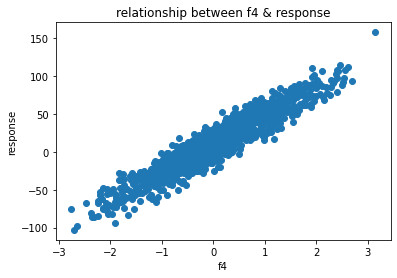

In [55]:
# let's plot f4 & response, cuz f4 corr value is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

In [56]:
# Redefine each column to be processed
columns = ['f1','f2','f3','f4','f5','response']
dt = dt.loc[:, columns]
dt.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [57]:
# Splitting the training and test set with the ratio of 8:2

from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5'] # Data that we want to utilize as training & test
X = dt.loc[:, features] # X are the data we want to use from 'features'
y = dt.loc[:, ['response']] # y is the data we want to use as target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

In [58]:
X_train.head()

,f1,f2,f3,f4,f5
382,0.313926,-0.234823,-0.729167,0.346540,1.090577
994,0.683057,1.374748,-0.648920,-0.684629,-1.294978
982,0.274861,1.301189,-0.910695,-0.818175,0.220356
47,-2.186260,-1.040181,-1.212700,-0.094067,0.501085
521,-0.101881,-0.676446,0.829162,-0.131754,0.343234


In [59]:
alpha = 0.25 # Set learning rate to 0.25
max_epoch = 6000 # Set max iteration to 6000

In [60]:
def train_model(X, y, alphaa=0.25, max_epochh=1000, k=50):
    w = np.random.randn(1, 10)
    b = np.random.randn(1,1)
    epoch=1

    while(epoch<=max_epochh):
        temp = X.sample(k)

        X_tr = temp.iloc[:,0,10].values
        y_tr = temp.iloc[:,-1].values

        Lw = w
        Lb = b

        loss = 0
        y_pred = []
        sq_loss = []

        for i in range(k):

            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)

            w = w - alphaa * Lw
            b = b - alphaa * Lb

            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)

        loss = train_model(y_pred, y_tr)

        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        alphaa = alphaa/1.02

    return w,b

In [61]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:10].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
w,b = train_model(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

IndexingError: Too many indexers

In [ ]:
# Define function train model
#--------------------------------------------------------------------------------------------------------
# This function returns w as estimated weights in a form of array, and hist_loss
#   to display training loss value for each epoch of the training loop
def train_model(X, y, alpha, max_epoch):
    from sklearn.linear_model import SGDRegressor
    reg_gd = SGDRegressor(loss='huber', eta0=alpha, max_iter=max_epoch, early_stopping=False, tol=None, verbose=1, random_state=1)
    hist_loss = reg_gd.fit(X_train, y_train.values.ravel())
    w = reg_gd.predict(X_test)

    #----- This is for plotting the line
    plt.scatter(y_test, w)
    plt.xlabel('Weights: $Y_i$')
    plt.ylabel('Predicted Weights: $\hat{Y}_i$')
    plt.title('Weights vs Predicted Weights: $Y_i$ vs $\hat{Y}_i$')
    ## plot a line, a perfect prediction would all fall on this line
    x = np.linspace(-75, 100, 100)
    y = x
    plott = plt.plot(x, y, 'r')
    #-----------------------------------

    return hist_loss, w, plott; # return values as tuples
hist_loss, w, plott= train_model(X, y, alpha, max_epoch)

In [62]:
w_list = pd.DataFrame(w, columns=['Predicted Weights'])
w_list

,Predicted Weights
0,2.824743
1,54.562976
2,6.429842
3,-45.042381
4,-10.701163
...,...
195,58.793530
196,54.429100
197,-30.811015
198,92.877653


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, w_list))
print(mean_squared_error(y_test, w_list))
print(r2_score(y_test, w_list))

4.086134558003941
26.375647735514704
0.9828160117985395


In [ ]:
#--------------------------------------------------------------------------------

In [ ]:
# Start of 2nd function -> Wang Yan


In [11]:
w_list = pd.DataFrame(w, columns=['Predicted Weights'])
w_list

,Predicted Weights
0,2.824743
1,54.562976
2,6.429842
3,-45.042381
4,-10.701163
...,...
195,58.793530
196,54.429100
197,-30.811015
198,92.877653


In [ ]:
#--------------------------------------------------------------------------------

In [ ]:
# Start of 2nd function -> Wang Yan
